In [49]:
# Ejemplo de overfit.

import pandas as pd
import numpy as np

from scipy import stats

from matplotlib import pyplot as plt


In [50]:
# Datos.
path  = "../datos/"
fname = "Tabla_75_snow.dat"
col = ["year", "snow", "deficit",
    "employees", "sheep", "grade" ]

# Se lee el archivo .dat
# y se ajusta su formato.
df = pd.read_table(path + fname,
    names = col, sep = "\s+")

df

,year,snow,deficit,employees,sheep,grade
0,1980,52.3,59.6,557969,12699,992
1,1981,64.9,57.9,570302,12947,994
2,1982,50.2,110.6,582845,12997,989
3,1983,74.2,196.4,592044,12140,963
4,1984,49.5,175.3,597125,11487,965
5,1985,64.7,211.9,601515,10443,977
6,1986,65.6,220.7,606500,9932,1001


In [53]:
# Datos.
y = df.iloc[0:6, 1]
x = df.iloc[0:6, 0]
x_1 = x
x_2 = df.iloc[0:6, 2]
x_3 = df.iloc[0:6, 3]
x_4 = df.iloc[0:6, 4]
x_5 = df.iloc[0:6, 5]

# Regresión múltiple.
YY = np.array([y]).T
XX = np.array((np.ones_like(x_1),
    x_1, x_2, x_3, x_4, x_5)).T

XX_sq = XX.T @ XX
XX_inv = np.linalg.inv(XX_sq)
BB = XX_inv @ ( XX.T @ YY )

y_reg = ( BB[0,0] + BB[1,0] * x_1 +
    BB[2,0] * x_2 + BB[3,0] * x_3
    + BB[4,0] * x_4 + BB[5,0] * x_5 )

# Residuales.
res = y - y_reg

# ANOVA
n = df.shape[0]
SST = ( ( y - y.mean() ) ** 2 ).sum()
SSR = ( ( y_reg - y.mean() ) ** 2 ).sum()
SSE = ( ( y - y_reg ) ** 2 ).sum()
Se = np.sqrt(SSE / (y.shape[0] - 6 ))
R = SSR / SST

print(f"n            :       {n}")
print(f"a_1          :    {BB[1,0]:.4f}")
print(f"b_1          : {BB[0,0]:.4f}")
print(f"X_mean       :    {x_1.mean():.4f}")
print(f"Y_mean       :      {y.mean():.4f}")
print(f"SST          :     {SST:.4f}")
print(f"SSR          :     {SSR:.4f}")
print(f"SSE          :       {SSE:.4f}")
print(f"RMSE         :     {Se:.4f}")
print(f"R            :       {R:.4f}")

n            :       7
a_1          :    -621.1514
b_1          : 1199418.0507
X_mean       :    1982.5000
Y_mean       :      59.3000
SST          :     510.3800
SSR          :     510.3827
SSE          :       0.0000
RMSE         :     inf
R            :       1.0000


C:\Users\Rodrigo\anaconda3\envs\gv2\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars


C:\Users\Rodrigo\anaconda3\envs\gv2\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000202E6774B88> has a label of '_' which cannot be automatically added to the legend.
  # This is added back by InteractiveShellApp.init_path()


Filliben Q-Q plot test: 0.9631


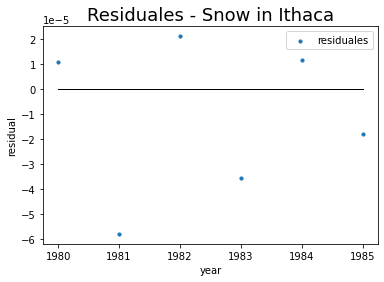

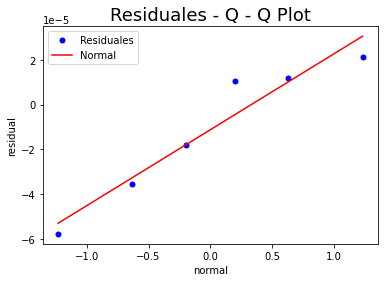

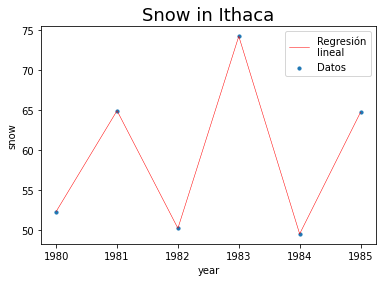

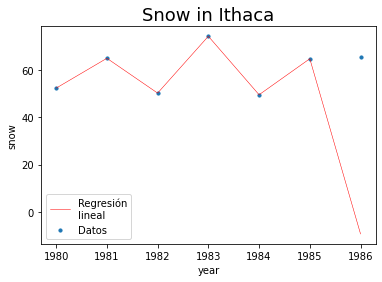

In [54]:
# Residuales - x
fig, ax = plt.subplots()
ax.scatter(x_1, res, s = 10)
ax.plot(x_1, np.zeros_like(x_1),
    color = "black", linewidth = 1)

ax.set_title("Residuales - Snow in Ithaca",
    fontsize = 18)
ax.set_xlabel(x.name)
ax.set_ylabel("residual")
ax.legend(["_", "residuales"])

# Q-Q plot
fig, ax = plt.subplots()
qqplot = stats.probplot(res, plot = ax)
ax.get_lines()[0].set_markersize(5)

ax.set_title("Residuales - Q - Q Plot",
    fontsize = 18)
ax.set_xlabel("normal")
ax.set_ylabel("residual")
ax.legend(["Residuales", "Normal"])

print(f"Filliben Q-Q plot test: {qqplot[1][2]:.4f}")

# Se grafican los valores.
fig, ax = plt.subplots()
ax.scatter(x, y, s = 10)
ax.plot(x, y_reg, color = "r", linewidth = 0.5)

ax.set_title("Snow in Ithaca",
    fontsize = 18)
ax.set_xlabel(x_1.name)
ax.set_ylabel(y.name)
ax.legend(["Regresión\nlineal", "Datos"])

y = df.iloc[:, 1]
x_1 = df.iloc[:, 0]
x_2 = df.iloc[:, 2]
x_3 = df.iloc[:, 3]
x_4 = df.iloc[:, 4]
x_5 = df.iloc[:, 5]

y_reg = ( BB[0,0] + BB[1,0] * x_1 +
    BB[2,0] * x_2 + BB[3,0] * x_3
    + BB[4,0] * x_4 + BB[5,0] * x_5 )

# Se grafican los valores.
fig, ax = plt.subplots()
ax.scatter(x_1, y, s = 10)
ax.plot(x_1, y_reg, color = "r", linewidth = 0.5)

ax.set_title("Snow in Ithaca",
    fontsize = 18)
ax.set_xlabel(x_1.name)
ax.set_ylabel(y.name)
ax.legend(["Regresión\nlineal", "Datos"])